In [1]:
from agrometflow.pipeline import run_pipeline
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")


In [1]:
from agrometflow.pipeline import run_pipeline_from_yaml, run_pipeline

configfile = "../examples/config.yml"
#results = run_pipeline_from_yaml(configfile)

In [1]:
from agrometflow.pipeline import run_pipeline_from_yaml, run_pipeline
config = {
    "global": {
        "project_name": "Senegal_2020",
        "verbose": True,
        "log_file": "logs/pipeline.log"
    },
    "climate": {
        "source": "power",
        "product":"nasapower",
        "start_date": "2020-01-01",
        "end_date": "2020-12-31",
        "variables": ["T2M", "PR", "TMIN", "TMAX"],
        "points": [(12.5, -1.2)],
        "output_dir": "data/climate/power"
    }
}


In [2]:
#results = run_pipeline(config)

In [3]:
#results

,date,T2M,PR,TMIN,TMAX,lat,lon
0,2020-01-01,19.99,0.0,12.33,29.89,12.5,-1.2
1,2020-01-02,17.55,0.0,11.25,26.45,12.5,-1.2
2,2020-01-03,16.16,0.0,9.42,25.45,12.5,-1.2
3,2020-01-04,17.16,0.0,9.90,26.99,12.5,-1.2
4,2020-01-05,19.64,0.0,11.52,29.88,12.5,-1.2


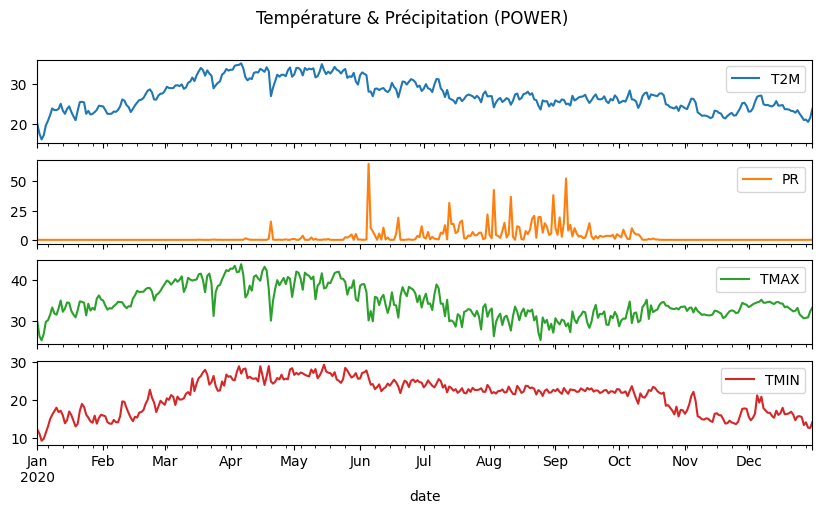

In [4]:
# 🔍 Cellule 3 – Afficher les résultats climat
import pandas as pd
clim = results.get("climate")
if clim is not None:
    display(clim.head())

    # 🌡️ Visualisation
    if "date" in clim.columns:
        clim["date"] = pd.to_datetime(clim["date"])
        clim.set_index("date")[["T2M", "PR", "TMAX" , "TMIN"]].plot(
            title="Température & Précipitation (POWER)", figsize=(10, 5), subplots=True
        )


In [ ]:
config2 = {
    "global": {
        "project_name": "Senegal_2020",
        "verbose": True,
        "log_file": "logs/pipeline.log"
    },
    "climate": {
        "source": "nasapower",
        "start_date": "2020-01-01",
        "end_date": "2024-12-31",
        "variables": ["T2M","PR"],
        "bbox": (-3.2, 12.5, -1.2, 14.5,),  # (min_lat, min_lon, max_lat, max_lon)
        "resolution": 0.5,
        "output_dir": "data/climate/power"
    }
}

In [3]:
#results = run_pipeline(config2)

In [3]:
# projections:
#   source: "CMIP6"
#   models: ["FGOALS-g3"]
#   variables: ["pr"]
#   scenarios: ["historical"]
#   output_dir: "data/projections/cmip6"
#   bbox: [-17.6, 12.22, -11.21, 16.8] # lon_min, lat_min, lon_max, lat_max
#   start: 1981

from agrometflow.pipeline import run_pipeline_from_yaml, run_pipeline
config = {
    "global": {
        "project_name": "Senegal_2020",
        "verbose": True,
        "log_file": "logs/pipeline.log"
    },
    "esgf":{
        "username": "xxxxxx",
        "password": "xxxxxx"  
    },
    "projections":{
        "source": "CMIP6",
        "models": ["IPSL-CM6A-LR"],
        "variables": ["pr", "tasmin", "tasmax", "rsds"],
        "scenarios": ["ssp245"],
        "output_dir": "data/projections/cmip6",
        #"points": [(12.5, -1.2)],
        "bbox": [-17.6, 12.22, -11.21, 16.8],
        "start": 2000,
    }
}

In [4]:
run_pipeline(config)

[INFO] 2026-01-07 16:32:18 —  Starting pipeline for project: Senegal_2020
[INFO] 2026-01-07 16:32:18 — Projections source: CMIP6
[INFO] 2026-01-07 16:32:18 —  Searching: list of all models that satisfy the rest of arguments

-------------------------------------------------------------------------------
Warning - defaulting to search with facets=*

This behavior is kept for backward-compatibility, but ESGF indexes might not
successfully perform a distributed search when this option is used, so some
results may be missing.  For full results, it is recommended to pass a list of
facets of interest when instantiating a context object.  For example,

      ctx = conn.new_context(facets='project,experiment_id')

Only the facets that you specify will be present in the facets_counts dictionary.

This warning is displayed when a distributed search is performed while using the
facets=* default, a maximum of once per context object.  To suppress this warning,
set the environment variable ESGF_PYC

{}

In [ ]:
import ee
ee.Initialize(project='ahmedmidingoyi')

chirps = ee.ImageCollection("UCSB-CHG/CHIRPS/DAILY") \
    .filterDate("2022-01-01", "2022-01-31") \
    .filterBounds(ee.Geometry.Point([34.85, -1.28]))  # ex: Nairobi

mean_precip = chirps.mean()

url = mean_precip.getDownloadURL({
    "scale": 5000,
    "region": ee.Geometry.Rectangle([34, -2, 36, 0])
})
print(url)

https://earthengine.googleapis.com/v1/projects/ahmedmidingoyi/thumbnails/69b8418335204231af12676df2de63aa-2c64fcff759975e7731a8f305d84f45c:getPixels


In [ ]:
mean_precip

In [ ]:
from netrc import netrc
from subprocess import Popen
from platform import system
from getpass import getpass
import os
import requests
urs = 'urs.earthdata.nasa.gov'    # Earthdata URL endpoint for authentication
prompts = ['Enter NASA Earthdata Login Username: ',
           'Enter NASA Earthdata Login Password: ']

netrc_name = ".netrc"

# Determine if netrc file exists, and if so, if it includes NASA Earthdata Login Credentials
try:
    netrcDir = os.path.expanduser(f"~/{netrc_name}")
    netrc(netrcDir).authenticators(urs)[0]

# Below, create a netrc file and prompt user for NASA Earthdata Login Username and Password
except FileNotFoundError:
    homeDir = os.path.expanduser("~")
    Popen('touch {0}{2} | echo machine {1} >> {0}{2}'.format(homeDir + os.sep, urs, netrc_name), shell=True)
    Popen('echo login {} >> {}{}'.format(getpass(prompt=prompts[0]), homeDir + os.sep, netrc_name), shell=True)
    Popen('echo \'password {} \'>> {}{}'.format(getpass(prompt=prompts[1]), homeDir + os.sep, netrc_name), shell=True)
    # Set restrictive permissions
    Popen('chmod 0600 {0}{1}'.format(homeDir + os.sep, netrc_name), shell=True)

In [ ]:
import requests

URL = 'https://data.gesdisc.earthdata.nasa.gov/data/MERRA2/M2T1NXSLV.5.12.4/1980/01/MERRA2_100.tavg1_2d_slv_Nx.19800101.nc4'

# Set the FILENAME string to the data file name, the LABEL keyword value, or any customized name. 
# Remember to include the same file extension as in the URL.
FILENAME = 'MERRA2_100.tavg1_2d_slv_Nx.19800101.nc4'

result = requests.get(URL)

In [ ]:
try:
    result.raise_for_status()
    f = open(FILENAME,'wb')
    f.write(result.content)
    f.close()
    print('contents of URL written to '+FILENAME)
except:
    print('requests.get() returned an error code '+str(result.status_code))
    raise

contents of URL written to MERRA2_100.tavg1_2d_slv_Nx.19800101.nc4


In [ ]:
import gzip
import shutil
from pathlib import Path
dd = Path("/mnt/d/Docs/ms6s4_d00061.bin.gz")
bin_path = dd.with_suffix("")
print(bin_path)
with gzip.open(dd, 'rb') as f_in:
    with open(bin_path, 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)

/mnt/d/Docs/ms6s4_d00061.bin


In [ ]:
480*1440

691200

In [ ]:
shape = (480, 1440)  # lat x lon
resolution = 0.25
lon_start = 0.125
lat_start = 59.875

In [ ]:
import numpy as np
with open(bin_path, "rb") as f:
    data = np.fromfile(f, dtype=">f4").reshape(shape)
    data[data == -9999] = np.nan

In [ ]:
import xarray as xr
lats = np.arange(lat_start, lat_start - shape[0] * resolution, -resolution)
lons = np.arange(lon_start, lon_start + shape[1] * resolution, resolution)

da = xr.DataArray(data[np.newaxis, :, :], coords=[[np.datetime64("2003-01-01")], lats, lons],
                              dims=["time", "lat", "lon"], name="precip")


In [ ]:
da.max()

<xarray.DataArray 'precip' ()> Size: 4B
array(368.96686, dtype=float32)